<a href="https://colab.research.google.com/github/nmodem2k/SNA/blob/master/Fatman_evolutionary_model(SNA3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [0]:
g=nx.Graph()

In [0]:
g.add_nodes_from(range(1,101))

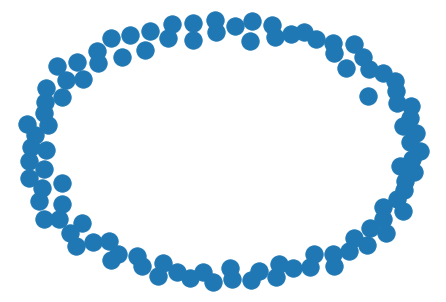

In [384]:
nx.draw(g)

In [0]:
def create_graph():
  G=nx.Graph()
  for i in range(1,101):
    G.add_node(i)
  return G

In [0]:
G=create_graph()

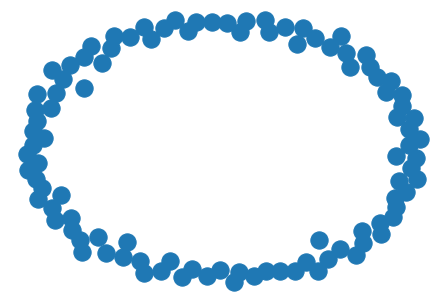

In [387]:
nx.draw(G)

In [0]:
def assign_bmi(G):
  for i in G.nodes():
    G.nodes[i]['name']=random.randint(15,40)
    G.nodes[i]['type']='person'


In [0]:
G=create_graph()
assign_bmi(G)

In [0]:
def  get_labels(G):
  dict_labels={}
  for i in G.nodes():
    dict_labels[i]=G.nodes[i]['name']
  return dict_labels

In [0]:
def  vary_size(G):
  dict_labels=[]
  for i in G.nodes():
    if G.nodes[i]['type']=='person':

      dict_labels.append(G.nodes[i]['name'])
    else:
      dict_labels.append(60)
  return dict_labels

In [0]:
dict_labels=get_labels(G)
sizes=vary_size(G)

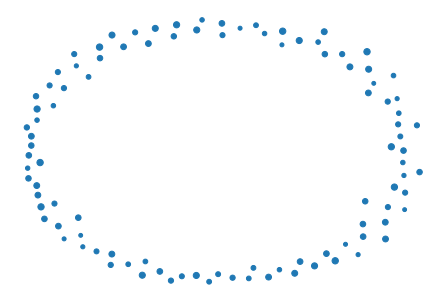

In [393]:
nx.draw(G,node_size=sizes)

In [0]:
def add_foci_nodes(G):
  n=G.number_of_nodes()
  i=n+1
  foci_nodes=['gym','brakery','yoga club','sports club','cultural club']
  for j in range(0,5):
    G.add_node(i)
    G.nodes[i]['name']=foci_nodes[j]
    G.nodes[i]['type']='focii'
    i+=1


In [0]:
def color(g):
  col=[]
  for i in g.nodes():
    if g.nodes[i]['type']=='person':
      if g.nodes[i]['name']==15:
        col.append('blue')
      elif g.nodes[i]['name']==40:
        col.append('red')
      else:
        col.append('green')
    else:
      col.append('yellow')
  return col

In [0]:
def add_foci_edges(g):
  person_nodes=[]
  focii_nodes=[]
  for i in g.nodes():
    if g.nodes[i]['type']=='person':
      person_nodes.append(i)
    else:
      focii_nodes.append(i)
  for i in person_nodes:
    c1=random.choice(focii_nodes)
    g.add_edge(c1,i)
  
  


In [0]:
def homophily(g):
  person_nodes=[]
  focii_nodes=[]
  for i in g.nodes():
    if g.nodes[i]['type']=='person':
      person_nodes.append(i)
    else:
      focii_nodes.append(i)
  for u in person_nodes:
    for v in person_nodes:
      if u!=v:
        diff=abs(g.nodes[u]['name']-g.nodes[v]['name'])
        p=float(1)/(diff+1000)
        r=random.uniform(0,1)
        if r<p:
          g.add_edge(u,v)
  
  


In [0]:
import math

In [0]:
def closure(g):
  list1=[]
  for u in (g.nodes()):
    for v in g.nodes():
      if u!=v and (g.nodes[u]['type']=='person' or g.nodes[v]['type']=='person'):
        nu=g.neighbors(u)
        nv=g.neighbors(v)
        k=len(set(nu) & set(nv))
        p=1-math.pow((1-0.008),k)
        tmp=[]
        tmp.append(u)
        tmp.append(v)
        tmp.append(p)
        list1.append(tmp)
  for each in list1:
    u=each[0]
    v=each[1]
    p=each[2]
    r=random.uniform(0,1)
    if r<p:
      g.add_edge(u,v)


In [0]:
def change_bmi(g):
  person_nodes=[]
  focii_nodes=[]
  for i in g.nodes():
    if g.nodes[i]['type']=='person':
      person_nodes.append(i)
    else:
      focii_nodes.append(i)
  for i in focii_nodes:
    if g.nodes[i]['name']=='brakery':
      for j in g.neighbors(i):
        if g.nodes[j]['name'] !=40:
          g.nodes[j]['name']=g.nodes[j]['name']+1
    elif g.nodes[i]['name']=='gym':
      for j in g.neighbors(i):
        if g.nodes[j]['name'] !=15:
          g.nodes[j]['name']=g.nodes[j]['name']-1
          

  


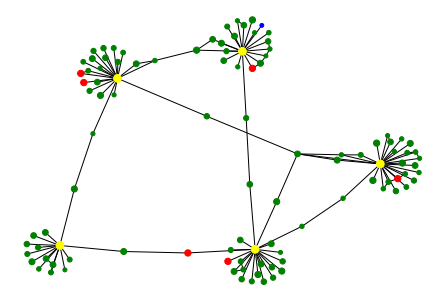

In [404]:
g=create_graph()
assign_bmi(g)
add_foci_nodes(g)
sizes=vary_size(g)
label=get_labels(g)
color1=color(g)
add_foci_edges(g)
homophily(g)
closure(g)
nx.draw(g,node_size=sizes,node_color=color1)

In [0]:
g=create_graph()
assign_bmi(g)
add_foci_nodes(g)
label=get_labels(g)
add_foci_edges(g)

In [0]:
import time

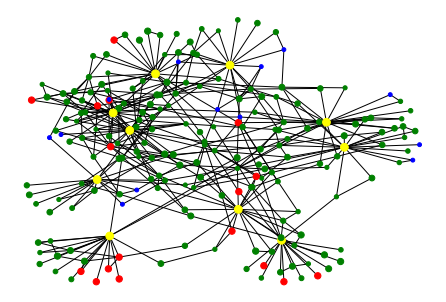

In [440]:
for  i in range(1,3):
  time.sleep(5)
  sizes=vary_size(g)
  color1=color(g)
  homophily(g)
  closure(g)
  change_bmi(g)
  nx.draw(g,node_size=sizes,node_color=color1)  

